In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."


In [4]:
df

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."
...,...
995,✅ Trip Verified | London Heathrow to Madrid. I...
996,✅ Trip Verified | Gatwick to St Lucia return....
997,✅ Trip Verified | It's been many years since ...
998,✅ Trip Verified | \r\nLondon Heathrow / Pisa r...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,That was supposed to be my flight but it was...
1,Have no fear when your BA flight is operated...
2,We have flown BA five times from western USA...
3,London Heathrow to Istanbul at the start of ...
4,"Jan 30th, I booked a last-minute, transatlant..."
...,...
995,London Heathrow to Madrid. I travel from LHR ...
996,Gatwick to St Lucia return. Recently returne...
997,It's been many years since I flew long haul ...
998,\r\nLondon Heathrow / Pisa return. My wife an...


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...
1,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...
2,We have flown BA five times from western USA...,We have flown BA five times from western USA ...
3,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th I booked a last minute transatlantic f...


In [11]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (..."
1,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v..."
2,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)..."
3,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s..."
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th I booked a last minute transatlantic f...,"[(Jan, n), (th, n), (booked, v), (last, a), (m..."


In [13]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (..."
1,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v..."
2,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)..."
3,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s..."
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th I booked a last minute transatlantic f...,"[(Jan, n), (th, n), (booked, v), (last, a), (m..."


In [15]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (...",suppose flight cancel hour takeoff nearly mo...
1,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v...",fear BA flight operate Finnair business clas...
2,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)...",fly BA five time western USA England Always ...
3,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s...",London Heathrow Istanbul start half term sch...
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th I booked a last minute transatlantic f...,"[(Jan, n), (th, n), (booked, v), (last, a), (m...",Jan th book last minute transatlantic flight...


In [16]:
df[['reviews','Lemma']]

,reviews,Lemma
0,That was supposed to be my flight but it was...,suppose flight cancel hour takeoff nearly mo...
1,Have no fear when your BA flight is operated...,fear BA flight operate Finnair business clas...
2,We have flown BA five times from western USA...,fly BA five time western USA England Always ...
3,London Heathrow to Istanbul at the start of ...,London Heathrow Istanbul start half term sch...
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th book last minute transatlantic flight...
...,...,...
995,London Heathrow to Madrid. I travel from LHR ...,London Heathrow Madrid travel LHR regularly ...
996,Gatwick to St Lucia return. Recently returne...,Gatwick St Lucia return Recently return two ...
997,It's been many years since I flew long haul ...,many year since fly long haul British Airway...
998,\r\nLondon Heathrow / Pisa return. My wife an...,London Heathrow Pisa return wife fly route t...


In [17]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,That was supposed to be my flight but it was...,That was supposed to be my flight but it was ...,"[(supposed, v), (flight, n), (cancelled, v), (...",suppose flight cancel hour takeoff nearly mo...,-0.7003,Negative
1,Have no fear when your BA flight is operated...,Have no fear when your BA flight is operated ...,"[(fear, n), (BA, n), (flight, n), (operated, v...",fear BA flight operate Finnair business clas...,0.6124,Positive
2,We have flown BA five times from western USA...,We have flown BA five times from western USA ...,"[(flown, v), (BA, n), (five, None), (times, n)...",fly BA five time western USA England Always ...,-0.1491,Negative
3,London Heathrow to Istanbul at the start of ...,London Heathrow to Istanbul at the start of t...,"[(London, n), (Heathrow, n), (Istanbul, n), (s...",London Heathrow Istanbul start half term sch...,0.7620,Positive
4,"Jan 30th, I booked a last-minute, transatlant...",Jan th I booked a last minute transatlantic f...,"[(Jan, n), (th, n), (booked, v), (last, a), (m...",Jan th book last minute transatlantic flight...,-0.9433,Negative


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    481
Negative    411
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f03b7c0c5e0>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.42732873930062687, -1.013602559471777, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.23308840325488736, -0.5528741233482419, '41.1%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

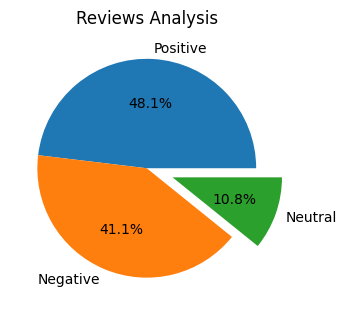

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

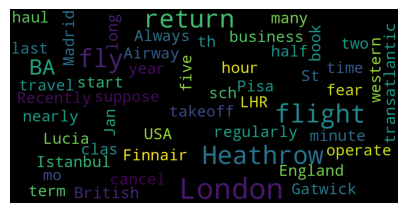

In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='Black',
        stopwords=stopwords,
        max_words=50,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(5, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)